In [118]:
import pandas as pd
import numpy as np
import os
import glob
from pathlib import Path
import datetime as dt
import hvplot.pandas
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,OneHotEncoder

### Read realtor data

In [92]:
realtor_2018_data = pd.read_csv(
    Path("realtor_data/2018_realtor_data.csv"))
realtor_2019_data = pd.read_csv(
    Path("realtor_data/2019_realtor_data.csv"))
display(realtor_2018_data)

,sold_date,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size
0,2018-01-02,for_sale,450000.0,3.0,2.0,0.09,"15 William St, North Arlington, NJ, 07031",15 William St,North Arlington,New Jersey,7031.0,NaN
1,2018-01-02,for_sale,234900.0,3.0,2.0,0.87,"185 Gilsum St, Keene, NH, 03431",185 Gilsum St,Keene,New Hampshire,3431.0,1752.0
2,2018-01-02,for_sale,234900.0,3.0,2.0,0.87,"185 Gilsum St, Keene, NH, 03431",185 Gilsum St,Keene,New Hampshire,3431.0,1752.0
3,2018-01-02,for_sale,1245000.0,1.0,1.0,NaN,"57 Reade St Apt 5D, New York, NY, 10007",57 Reade St Apt 5D,New York,New York,10007.0,785.0
4,2018-01-02,for_sale,234900.0,3.0,2.0,0.87,"185 Gilsum St, Keene, NH, 03431",185 Gilsum St,Keene,New Hampshire,3431.0,1752.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,2018-12-31,for_sale,389000.0,1.0,1.0,NaN,"62 Park Ter W Apt A26, New York, NY, 10034",62 Park Ter W Apt A26,New York,New York,10034.0,800.0
25192,2018-12-31,for_sale,3995000.0,2.0,3.0,NaN,"200 E 62nd St Apt 14E, New York, NY, 10065",200 E 62nd St Apt 14E,New York,New York,10065.0,1936.0
25193,2018-12-31,for_sale,399000.0,NaN,NaN,1.15,"1 Mayer Ln, Pomona, NY, 10970",1 Mayer Ln,Pomona,New York,10970.0,NaN
25194,2018-12-31,for_sale,3475000.0,2.0,2.0,NaN,"200 Mercer St Apt 4E, New York City, NY, 10012",200 Mercer St Apt 4E,New York City,New York,10012.0,2500.0


In [93]:
csv_files = glob.glob('realtor_data/*')
csv_files

['realtor_data\\2018_realtor_data.csv', 'realtor_data\\2019_realtor_data.csv']

### Merge realtor data

In [94]:
realtor_data = pd.DataFrame()

for file in csv_files:
            df_temp = pd.read_csv(file)
            realtor_data = realtor_data.append(df_temp)
            
realtor_data.set_index("sold_date", drop=True, inplace=True)

display(realtor_data)

C:\Users\Maria Angels Bonany\AppData\Local\Temp\ipykernel_8908\471774926.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  realtor_data = realtor_data.append(df_temp)
C:\Users\Maria Angels Bonany\AppData\Local\Temp\ipykernel_8908\471774926.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  realtor_data = realtor_data.append(df_temp)


,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size
sold_date,,,,,,,,,,,
2018-01-02,for_sale,450000.0,3.0,2.0,0.09,"15 William St, North Arlington, NJ, 07031",15 William St,North Arlington,New Jersey,7031.0,NaN
2018-01-02,for_sale,234900.0,3.0,2.0,0.87,"185 Gilsum St, Keene, NH, 03431",185 Gilsum St,Keene,New Hampshire,3431.0,1752.0
2018-01-02,for_sale,234900.0,3.0,2.0,0.87,"185 Gilsum St, Keene, NH, 03431",185 Gilsum St,Keene,New Hampshire,3431.0,1752.0
2018-01-02,for_sale,1245000.0,1.0,1.0,NaN,"57 Reade St Apt 5D, New York, NY, 10007",57 Reade St Apt 5D,New York,New York,10007.0,785.0
2018-01-02,for_sale,234900.0,3.0,2.0,0.87,"185 Gilsum St, Keene, NH, 03431",185 Gilsum St,Keene,New Hampshire,3431.0,1752.0
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,for_sale,259900.0,3.0,2.0,0.18,"20 Russell Rd, Meriden, CT, 06450",20 Russell Rd,Meriden,Connecticut,6450.0,1312.0
2019-12-31,for_sale,299999.0,NaN,NaN,0.18,"439 Edgewood St, Hartford, CT, 06112",439 Edgewood St,Hartford,Connecticut,6112.0,3922.0
2019-12-31,for_sale,1598000.0,3.0,2.0,NaN,"57 L St Apt 10, Boston, MA, 02127",57 L St Apt 10,Boston,Massachusetts,2127.0,1574.0


In [95]:
realtor_data_mean=realtor_data['house_size'].mean()

realtor_data['house_size'].fillna(value=realtor_data_mean, inplace=True)

In [96]:
realtor_data.drop("status", axis=1)

,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size
sold_date,,,,,,,,,,
2018-01-02,450000.0,3.0,2.0,0.09,"15 William St, North Arlington, NJ, 07031",15 William St,North Arlington,New Jersey,7031.0,2001.323862
2018-01-02,234900.0,3.0,2.0,0.87,"185 Gilsum St, Keene, NH, 03431",185 Gilsum St,Keene,New Hampshire,3431.0,1752.000000
2018-01-02,234900.0,3.0,2.0,0.87,"185 Gilsum St, Keene, NH, 03431",185 Gilsum St,Keene,New Hampshire,3431.0,1752.000000
2018-01-02,1245000.0,1.0,1.0,NaN,"57 Reade St Apt 5D, New York, NY, 10007",57 Reade St Apt 5D,New York,New York,10007.0,785.000000
2018-01-02,234900.0,3.0,2.0,0.87,"185 Gilsum St, Keene, NH, 03431",185 Gilsum St,Keene,New Hampshire,3431.0,1752.000000
...,...,...,...,...,...,...,...,...,...,...
2019-12-31,259900.0,3.0,2.0,0.18,"20 Russell Rd, Meriden, CT, 06450",20 Russell Rd,Meriden,Connecticut,6450.0,1312.000000
2019-12-31,299999.0,NaN,NaN,0.18,"439 Edgewood St, Hartford, CT, 06112",439 Edgewood St,Hartford,Connecticut,6112.0,3922.000000
2019-12-31,1598000.0,3.0,2.0,NaN,"57 L St Apt 10, Boston, MA, 02127",57 L St Apt 10,Boston,Massachusetts,2127.0,1574.000000


In [97]:
realtor_data.describe()

,price,bed,bath,acre_lot,zip_code,house_size
count,4.962300e+04,46919.000000,47796.000000,33193.000000,49623.000000,49623.000000
mean,7.593899e+05,3.166692,2.348544,3.730651,7655.035790,2001.323862
std,1.125491e+06,1.648663,1.280664,127.096917,3564.782734,2033.067123
min,2.000000e+03,1.000000,1.000000,0.000000,802.000000,280.000000
25%,3.150000e+05,2.000000,1.000000,0.090000,6052.000000,1262.000000
50%,4.800000e+05,3.000000,2.000000,0.190000,7501.000000,2001.323862
75%,7.999000e+05,4.000000,3.000000,0.520000,10017.000000,2001.323862
max,3.500000e+07,25.000000,18.000000,9999.000000,19977.000000,52708.000000


# Histogram of the columns, to represent the distribution of the data

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bed'}>],
       [<AxesSubplot:title={'center':'bath'}>,
        <AxesSubplot:title={'center':'acre_lot'}>],
       [<AxesSubplot:title={'center':'zip_code'}>,
        <AxesSubplot:title={'center':'house_size'}>]], dtype=object)

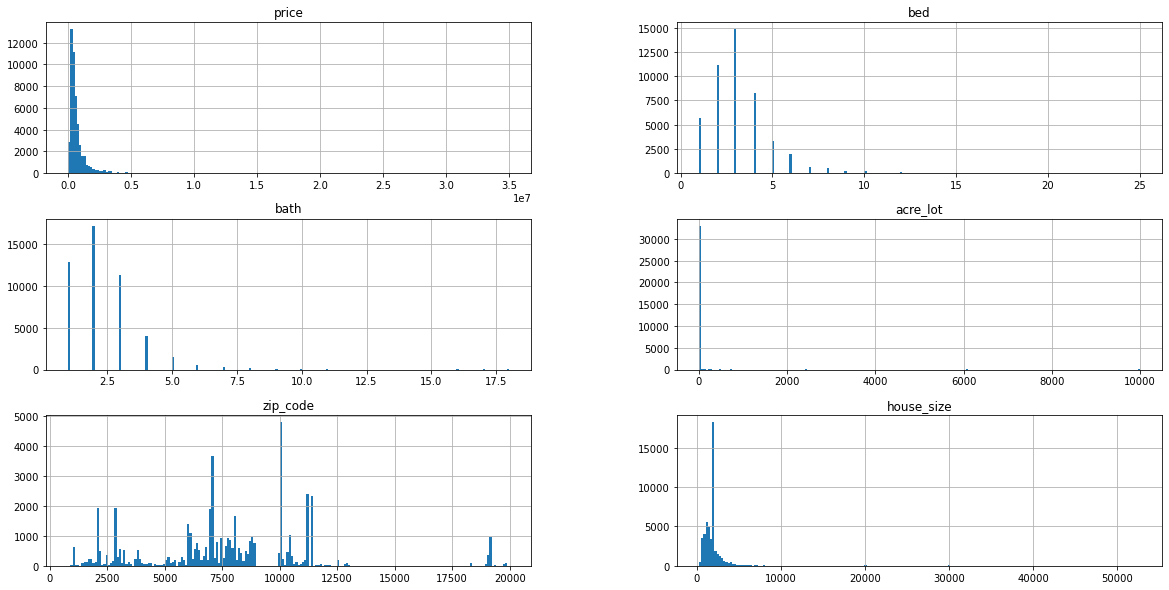

In [98]:
realtor_data.hist(bins=200,figsize=[20,10])

<AxesSubplot:title={'center':'Historical US market house prices - 2018-2019'}, xlabel='sold_date'>

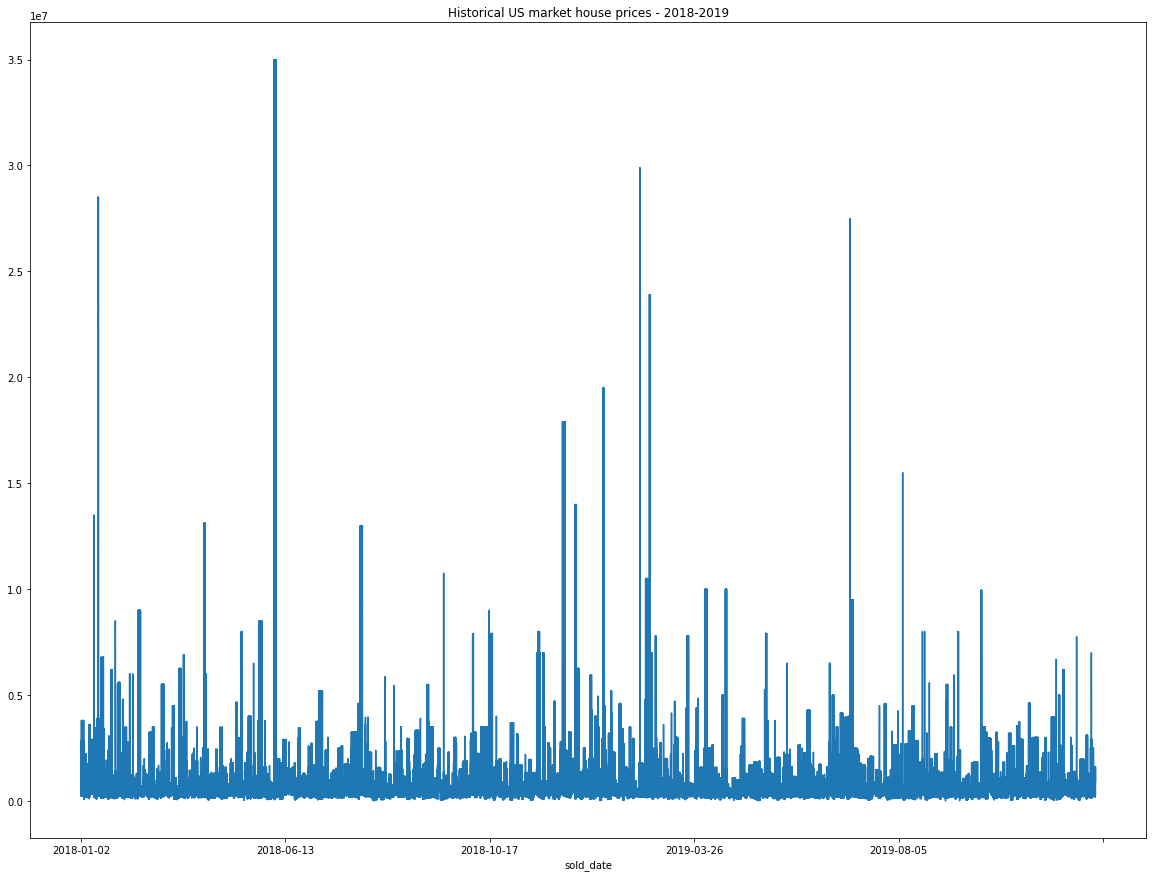

In [99]:
# Plot the historical sold prices of the US housing market to analyze trend for years 2018 and 2019
realtor_data["price"].plot(
    title="Historical US market house prices - 2018-2019",
    figsize=[20,15]
)

In [100]:
house_prices_by_year = realtor_data.groupby('sold_date')['price','house_size'].mean()

house_prices_by_year.head()

C:\Users\Maria Angels Bonany\AppData\Local\Temp\ipykernel_8908\1065310522.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  house_prices_by_year = realtor_data.groupby('sold_date')['price','house_size'].mean()


,price,house_size
sold_date,,
2018-01-02,1.162506e+06,1952.226902
2018-01-03,6.085826e+05,1919.735795
2018-01-04,1.130069e+06,1849.377330
2018-01-05,4.568947e+05,1929.566686
2018-01-08,6.451982e+05,2031.619229


In [101]:
house_prices_by_year.hvplot(
    x="sold_date",
    y=["price", "house_size"],
    legend="top",
    title ="US home sale price per year by house size, 2018-2019",
    height=600,
    width=850,
    rot=80)

:NdOverlay   [Variable]
   :Curve   [sold_date]   (value)

In [102]:
prices_by_year_by_state = realtor_data.groupby(['sold_date','state'])['price','house_size'].mean()

C:\Users\Maria Angels Bonany\AppData\Local\Temp\ipykernel_8908\1078990347.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  prices_by_year_by_state = realtor_data.groupby(['sold_date','state'])['price','house_size'].mean()


In [103]:
prices_by_year_by_state.hvplot(
    x="sold_date",
    y=["price", "house_size"],
    legend="top",
    title ="US home sale price per year by state, 2018-2019",
    groupby="state",
    height=400,
    width=720,
    rot=80)

:DynamicMap   [state]
   :NdOverlay   [Variable]
      :Curve   [sold_date]   (value)

# Encode the dataset’s categorical variables using OneHotEncoder

In [133]:
categorical_variables = list(realtor_data.dtypes[realtor_data.dtypes == "object"].index)

In [134]:
display(categorical_variables)

['status', 'full_address', 'street', 'city', 'state']

In [135]:
enc = OneHotEncoder(sparse=False)

In [136]:
encoded_data = enc.fit_transform(realtor_data[categorical_variables])

In [137]:
encoded_df = pd.DataFrame(
    encoded_data,
    columns = enc.get_feature_names_out(categorical_variables)
)

In [138]:
display(encoded_df)

,status_for_sale,"full_address_060 Chippaquasett Rd, Portsmouth, RI, 02872","full_address_1 Academy Cir Unit 309, Philadelphia, PA, 19146","full_address_1 Arnold Palmer S U1 Ct Unit 1, Vernon, NJ, 07462","full_address_1 Avery St Apt 31D, Boston, MA, 02111","full_address_1 Beaver Ridge Rd, Barnstead, NH, 03225","full_address_1 Belmont Rd Apt 225, West Harwich, MA, 02671","full_address_1 Bennett Ln, Newtown, PA, 18940","full_address_1 Bethany Ct, Hamilton, NJ, 08610","full_address_1 Bina Ct, Edison, NJ, 08820",...,state_Maine,state_Massachusetts,state_New Hampshire,state_New Jersey,state_New York,state_Pennsylvania,state_Puerto Rico,state_Rhode Island,state_Vermont,state_Virgin Islands
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49618,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49619,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49620,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49621,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Split training into testing sets (Create X, or features DataFrame, and create y, or target DataFrame)

In [152]:
features = realtor_data["price"]

target = realtor_data["state"]

In [153]:
training_features, testing_features, training_targets, testing_targets = train_test_split(features, target)

In [156]:
training_features

sold_date
2018-09-19    699000.0
2018-02-13    264950.0
2018-10-17    174950.0
2019-07-17    139000.0
2019-05-21    629900.0
                ...   
2018-06-12    799000.0
2018-04-11    439000.0
2018-06-22    820000.0
2019-02-05    449000.0
2019-04-01    359000.0
Name: price, Length: 37217, dtype: float64

# Create and use a classifier that can predict whether the house sold price price will be higher or lower: Linear Regresion model

In [157]:
linear_regression_model = LinearRegression()

# Fit: Train the Model by supplying it with some training it

In [158]:
linear_regression_model.fit(training_features, training_targets)

ValueError: Expected 2D array, got 1D array instead:
array=[699000. 264950. 174950. ... 820000. 449000. 359000.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# Generate predictions from the model we just fit

In [159]:
predictions = linear_regression_model.predict(training_features)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
results_df = pd.DataFrame({"Prediction": predictions, "Actual": training_targets})
results_df

# Apply the fitted model to the test dataset

In [ ]:
testing_predictions = linear_regression_model.predict(testing_features)

In [ ]:
results_df = pd.DataFrame({
    "Testing Data Predictions": testing_predictions,
    "Testing Data Actual Targets": testing_targets})
results_df

# Compare each predicted value to its actual value

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(testing_targets, testing_predictions)

# We evaluated the model predictions. If high accuracy (closer to 1) it may ean that there is overfitting which may mean that the model won't perform well on new data it was not trained on

# We can categorize the predictions on higher house prices or lower house prices according to a confusion matrix.